In [1]:
import numpy as np 
from scipy.linalg import lu 
import timeit 
import matplotlib.pyplot as plt 
import numpy as np
import shutil
import os

# Sizes of the matrices 
ns = [5, 10, 20, 50, 100]

In [2]:
# Generating the random matrices
if os.path.exists('random'):
    shutil.rmtree('random')
    os.makedirs('random')
else:
    os.makedirs('random')

for n in ns: 
    # Generate a random n x n matrix with random values between 1 and 10
    A = np.random.randint(1,10,(n,n))

    # save matrix A to file
    np.save(f'./random/matrix_{n}.npy',A)

In [3]:
# calculating time for LU decomposition and inversion in python

# Time measurements for LU decomposition and inversion using NumPy 
lu_times = []
inv_times = []

for n in ns: 
    # load matrix A from file
    A = np.load(f'./random/matrix_{n}.npy')
    
    # Time the LU decomposition 
    lu_start_time = timeit.default_timer() 
    P, L, U = lu(A) 
    lu_end_time = timeit.default_timer() 
    lu_times.append((lu_end_time - lu_start_time) * 1e6) 
    # Convert to microseconds 
    # Time the inversion 
    inv_start_time = timeit.default_timer() 
    A_inv = np.linalg.inv(A) 
    inv_end_time = timeit.default_timer() 
    inv_times.append((inv_end_time - inv_start_time) * 1e6) # Convert to microseconds

In [4]:
lu_times

[189.4999877549708,
 317.9999766871333,
 399.00001138448715,
 524.0999744273722,
 7803.699991200119]

In [5]:
inv_times

[216.00001491606236,
 241.9000375084579,
 845.3999762423337,
 1792.9999739862978,
 3327.400016132742]

In [7]:
# run the matlab script first to get the .mat files

# Import loadmat function from scipy.io
from scipy.io import loadmat

# Load the .mat file
lu_times_mat = loadmat('lu_times.mat')
inv_times_mat = loadmat('inv_times.mat')

# Access variables from the loaded data
lu_times_mat = list(lu_times_mat['lu_times'][0])
inv_times_mat = list(inv_times_mat['inv_times'][0])


In [8]:
print(lu_times_mat)
print(inv_times_mat)

[84.5, 45.7, 73.10000000000001, 90.60000000000001, 287.2]
[31.5, 21.5, 36.4, 69.8, 411.1]


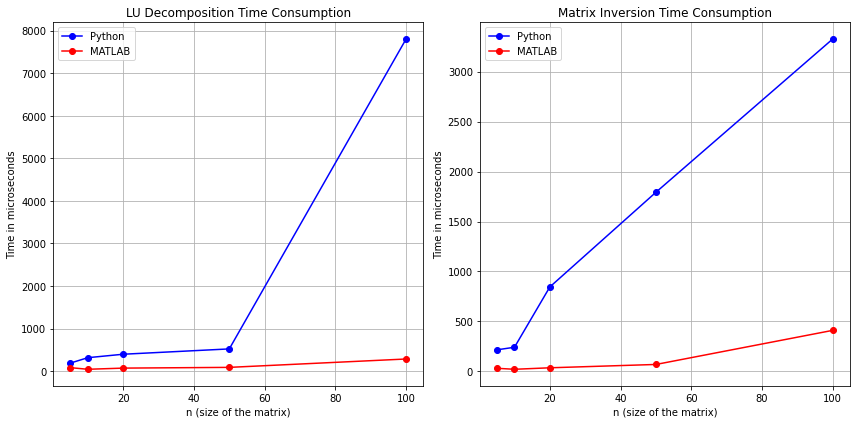

In [9]:
# Plot both LU decomposition and matrix inversion in one subplot
plt.figure(figsize=(12, 6))

# Subplot 1: LU Decomposition
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(ns, lu_times, label='Python', color='blue', marker='o')
plt.plot(ns, lu_times_mat, label='MATLAB', color='red', marker='o')
plt.xlabel('n (size of the matrix)')
plt.ylabel('Time in microseconds')
plt.title('LU Decomposition Time Consumption')
plt.legend()
plt.grid(True)

# Subplot 2: Matrix Inversion
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(ns, inv_times, label='Python', color='blue', marker='o')
plt.plot(ns, inv_times_mat, label='MATLAB', color='red', marker='o')
plt.xlabel('n (size of the matrix)')
plt.ylabel('Time in microseconds')
plt.title('Matrix Inversion Time Consumption')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [10]:
# Printing the times required for LU method in python and matlab
print("LU Decomposition Time Consumption (in microseconds)")
print("Python")
print(lu_times)
print("Matlab")
print(lu_times_mat)

# Printing the times required for inverse method in python and matlab
print("\nMatrix Inversion Time Consumption (in microseconds)")
print("Python")
print(inv_times)
print("Matlab")
print(inv_times_mat)

LU Decomposition Time Consumption (in microseconds)
Python
[189.4999877549708, 317.9999766871333, 399.00001138448715, 524.0999744273722, 7803.699991200119]
Matlab
[84.5, 45.7, 73.10000000000001, 90.60000000000001, 287.2]

Matrix Inversion Time Consumption (in microseconds)
Python
[216.00001491606236, 241.9000375084579, 845.3999762423337, 1792.9999739862978, 3327.400016132742]
Matlab
[31.5, 21.5, 36.4, 69.8, 411.1]


### 1. a) Which method of calculating inverse is used in the two programs?

#### Matlab 
```matlab
% Calculate inverse using the 'inv' function
inverse_A = inv(A);
```

For small matrices, MATLAB's inv function often uses LU (Lower-Upper) decomposition with partial pivoting.
For larger matrices, MATLAB may use more advanced algorithms, such as the MUltifrontal Massively Parallel sparse LU (MUMPS) solver or other specialized methods.

#### Python
```python 
# Calculate inverse using the 'inv' function from NumPy
inverse_A = np.linalg.inv(A)
```
NumPy's np.linalg.inv function also uses LU decomposition by default for general square matrices.
NumPy may internally utilize LAPACK (Linear Algebra PACKage) routines for more efficient numerical linear algebra operations.

